In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Cleaned_data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Age,Python,R,SQL,Spark,AWS,Tableau,Excel,Categorized_title,Seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,0,1,1,Data Scientist,NaN
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,0,0,Data Scientist,NaN
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,1,0,0,1,Data Scientist,NaN
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,0,0,Data Scientist,NaN
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,1,0,0,0,1,Data Scientist,NaN


In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employer_provided_salary', 'Min_salary', 'Max_salary',
       'Avg_salary', 'Company', 'State', 'Similar_state', 'Age', 'Python', 'R',
       'SQL', 'Spark', 'AWS', 'Tableau', 'Excel', 'Categorized_title',
       'Seniority', 'description_length', 'Number_of_Competitors'],
      dtype='object')

In [5]:
df['Company'] = df.Company.apply(lambda x: x.replace('\n', ''))

In [6]:
df['description_length'] = df['Job Description'].apply(lambda x: len(x))

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: description_length, Length: 742, dtype: int64

In [7]:
df['Number_of_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [8]:
df['Max_salary'] = df.apply(lambda x: x.Max_salary*2 if x.Hourly_salary ==1 else x.Max_salary, axis =1)
df['Min_salary'] = df.apply(lambda x: x.Min_salary*2 if x.Hourly_salary ==1 else x.Min_salary, axis =1)

In [11]:
df['Avg_salary'] = df.apply(lambda x: x.Avg_salary*2 if x.Hourly_salary ==1 else x.Avg_salary, axis =1)

In [12]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employer_provided_salary', 'Min_salary', 'Max_salary',
       'Avg_salary', 'Company', 'State', 'Similar_state', 'Age', 'Python', 'R',
       'SQL', 'Spark', 'AWS', 'Tableau', 'Excel', 'Categorized_title',
       'Seniority', 'description_length', 'Number_of_Competitors'],
      dtype='object')

In [40]:
df = df.fillna('Unknown')

In [13]:
df.dtypes

Job Title                    object
Salary Estimate              object
Job Description              object
Rating                      float64
Company Name                 object
Location                     object
Headquarters                 object
Size                         object
Founded                       int64
Type of ownership            object
Industry                     object
Sector                       object
Revenue                      object
Competitors                  object
Hourly_salary                 int64
Employer_provided_salary      int64
Min_salary                    int64
Max_salary                    int64
Avg_salary                  float64
Company                      object
State                        object
Similar_state                 int64
Age                           int64
Python                        int64
R                             int64
SQL                           int64
Spark                         int64
AWS                         

In [14]:
df.describe()

,Rating,Founded,Hourly_salary,Employer_provided_salary,Min_salary,Max_salary,Avg_salary,Similar_state,Age,Python,R,SQL,Spark,AWS,Tableau,Excel,description_length,Number_of_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,0.557951,46.591644,0.528302,0.001348,0.512129,0.225067,0.237197,0.199461,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,0.496965,53.778815,0.499535,0.036711,0.500190,0.417908,0.425651,0.399865,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [18]:
df[['Rating','Avg_salary','Number_of_Competitors','description_length']].corr()

,Rating,Avg_salary,Number_of_Competitors,description_length
Rating,1.000000,0.012517,0.027190,-0.012281
Avg_salary,0.012517,1.000000,0.083263,0.070474
Number_of_Competitors,0.027190,0.083263,1.000000,0.104620
description_length,-0.012281,0.070474,0.104620,1.000000


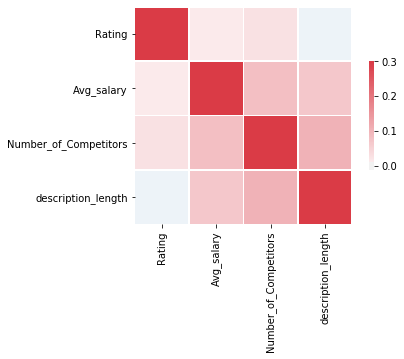

In [20]:
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(df[['Rating','Avg_salary','Number_of_Competitors','description_length']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Histogram for  Rating


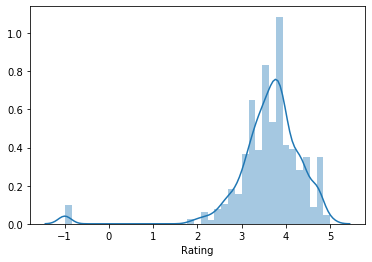

Histogram for  Age


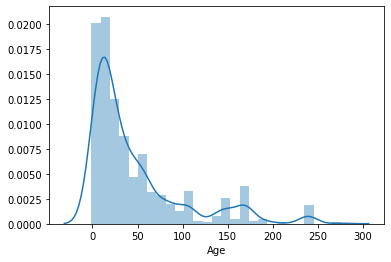

Histogram for  Avg_salary


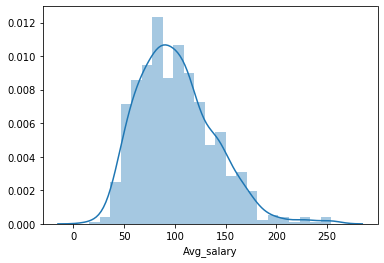

In [24]:
df_hist = df[['Rating','Age','Avg_salary']]
for i in df_hist.columns:
    print("Histogram for ",i)
    sns.distplot(df[i])
    plt.show()

In [29]:
df_cat = df[['Categorized_title','Seniority','State','Headquarters','Rating','Size', 'Type of ownership', 'Industry','Sector', 'Revenue','Age',
       'Python', 'R', 'SQL', 'Spark', 'AWS', 'Tableau', 'Excel']]

Graph for Categorized_title, Total Categories: 6


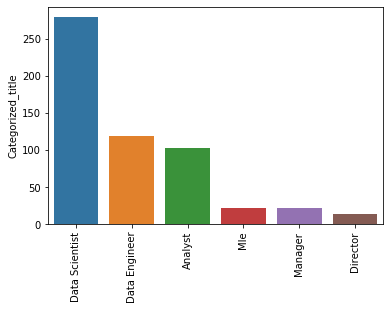

Graph for Seniority, Total Categories: 2


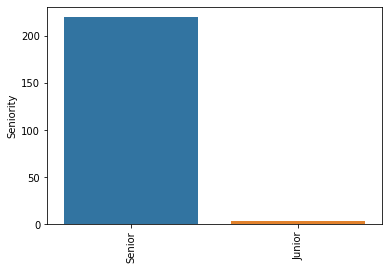

Graph for State, Total Categories: 31


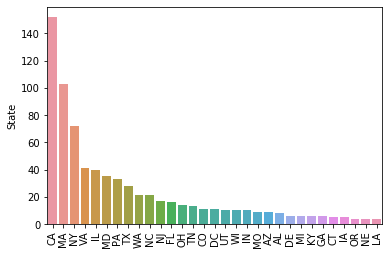

Graph for Headquarters, Total Categories: 31


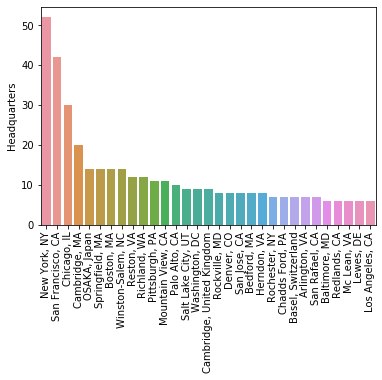

Graph for Rating, Total Categories: 31


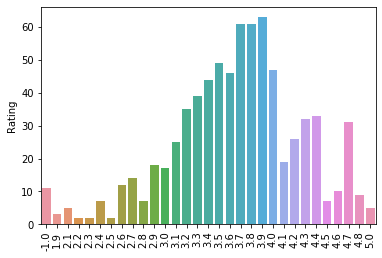

Graph for Size, Total Categories: 9


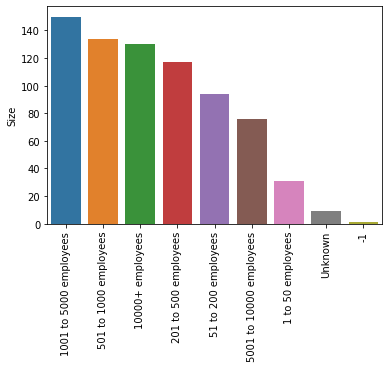

Graph for Type of ownership, Total Categories: 11


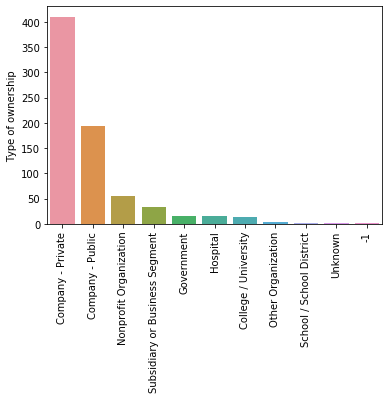

Graph for Industry, Total Categories: 31


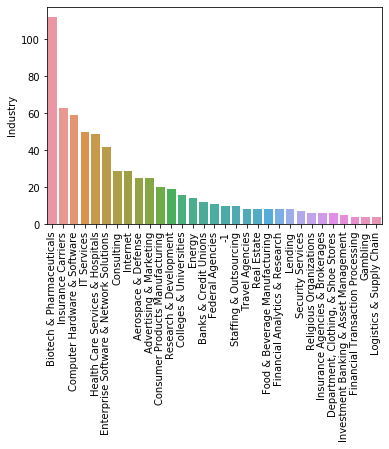

Graph for Sector, Total Categories: 25


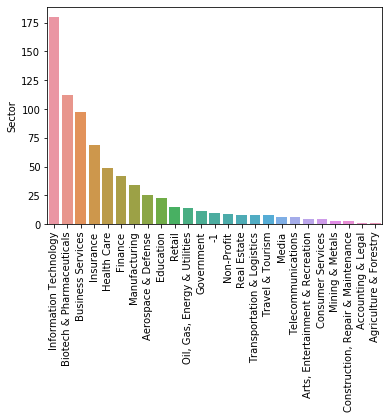

Graph for Revenue, Total Categories: 14


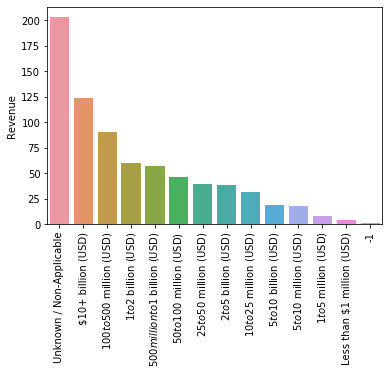

Graph for Age, Total Categories: 31


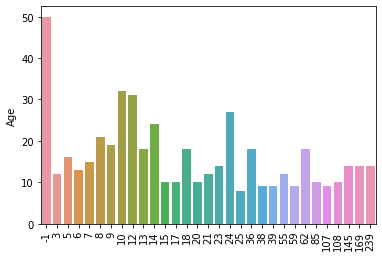

Graph for Python, Total Categories: 2


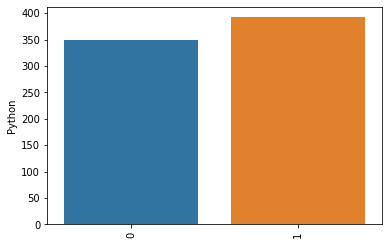

Graph for R, Total Categories: 2


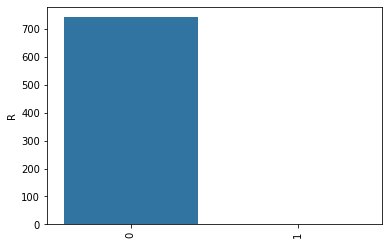

Graph for SQL, Total Categories: 2


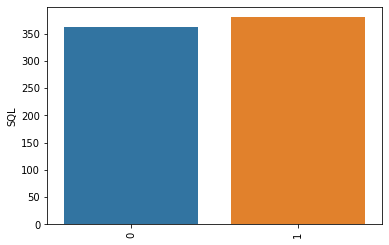

Graph for Spark, Total Categories: 2


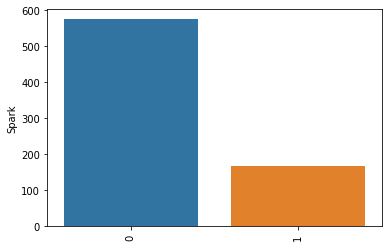

Graph for AWS, Total Categories: 2


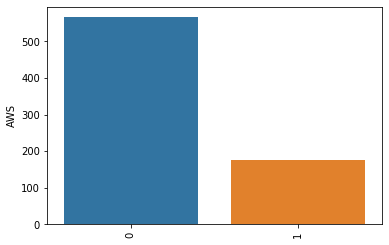

Graph for Tableau, Total Categories: 2


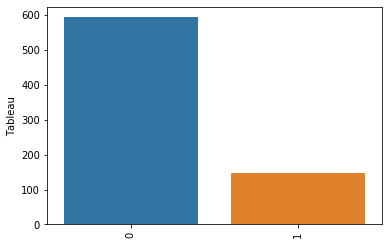

Graph for Excel, Total Categories: 2


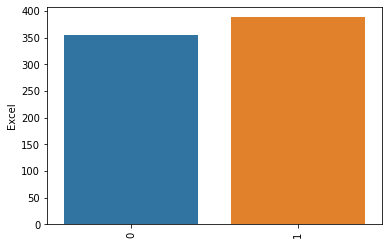

In [33]:
for col in df_cat.columns:
    num = df_cat[col].value_counts()
    if len(num) > 31:
        num = df_cat[col].value_counts()[:31]
    print("Graph for %s, Total Categories: %d" % (col, len(num)))
    chart = sns.barplot(x = num.index, y = num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()


In [34]:
pd.pivot_table(df, index = ['Categorized_title', 'Seniority'], values = 'Avg_salary')

Avg_salary
Categorized_title Seniority            
Analyst           Junior      53.250000
                  Senior      80.092593
Data Engineer     Senior     124.689189
Data Scientist    Junior     106.500000
                  Senior     138.956522
Mle               Senior     142.071429

In [36]:
pd.pivot_table(df, index = 'Categorized_title', values = 'Avg_salary')

,Avg_salary
Categorized_title,
Analyst,66.122549
Data Engineer,105.403361
Data Scientist,117.564516
Director,168.607143
Manager,84.022727
Mle,126.431818


In [39]:
pd.pivot_table(df, index = ['Categorized_title', 'Seniority'], values = 'Avg_salary')

Avg_salary
Categorized_title Seniority            
Analyst           Junior      53.250000
                  Senior      80.092593
                  Unknown     61.308219
Data Engineer     Senior     124.689189
                  Unknown     96.701220
Data Scientist    Junior     106.500000
                  Senior     138.956522
                  Unknown    107.043011
Director          Unknown    168.607143
Manager           Unknown     84.022727
Mle               Senior     142.071429
                  Unknown    119.133333
Unknown           Senior     109.061404
                  Unknown     78.500000

In [42]:
pd.pivot_table(df, index = ['State','Categorized_title'], values = 'Avg_salary').sort_values('State', ascending = False)

Avg_salary
State Categorized_title            
WI    Unknown             54.000000
      Data Scientist     113.500000
      Analyst             58.833333
WA    Unknown             97.500000
      Data Scientist      99.764706
...                             ...
AZ    Analyst             55.000000
      Unknown            124.500000
AL    Unknown             43.750000
      Data Engineer       65.000000
      Analyst             62.200000

[114 rows x 1 columns]

In [43]:
pd.set_option('display.max_rows', None)

In [48]:
pd.pivot_table(df, index = ['State','Categorized_title'], values = 'Avg_salary').sort_values(by = ['Categorized_title', 'Avg_salary'], ascending = False)

,,Avg_salary
State,Categorized_title,
AZ,Unknown,124.500000
MA,Unknown,110.010870
KY,Unknown,103.500000
CA,Unknown,99.907407
WA,Unknown,97.500000
OH,Unknown,91.166667
NC,Unknown,90.916667
MD,Unknown,88.750000
NJ,Unknown,82.500000


In [50]:
pd.pivot_table(df, index = ['Revenue'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
Revenue,
$5 to $10 million (USD),126.111111
$1 to $5 million (USD),119.312500
-1,117.500000
$10+ billion (USD),115.568548
Less than $1 million (USD),108.625000
Unknown / Non-Applicable,105.002463
$1 to $2 billion (USD),104.533333
$50 to $100 million (USD),102.434783
$10 to $25 million (USD),101.515625


In [55]:
df_piv = df[['Rating','Industry','Sector','Number_of_Competitors','Hourly_salary','Employer_provided_salary','Python','R',
            'Spark', 'AWS','Tableau','Excel','Type of ownership','Avg_salary']]

In [62]:
pd.pivot_table(df, index = ['Rating'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
Rating,
-1.0,136.181818
5.0,134.700000
2.5,120.000000
4.5,117.714286
4.1,116.368421
3.9,113.071429
2.6,109.083333
4.4,108.606061
4.0,107.170213


In [63]:
pd.pivot_table(df, index = ['Industry'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Investment Banking & Asset Management,118.400000


In [64]:
pd.pivot_table(df, index = ['Sector'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
Sector,
Media,116.666667
-1,114.650000
Accounting & Legal,113.500000
Information Technology,113.191667
Biotech & Pharmaceuticals,112.098214
Insurance,105.942029
Real Estate,104.750000
Mining & Metals,104.000000
Telecommunications,102.333333


In [65]:
pd.pivot_table(df, index = ['Hourly_salary'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
Hourly_salary,
0,103.1539
1,50.0000


In [66]:
pd.pivot_table(df, index = ['Employer_provided_salary'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
Employer_provided_salary,
1,124.647059
0,100.890345


In [67]:
pd.pivot_table(df, index = ['Python'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
Python,
1,112.653061
0,88.870000


In [68]:
pd.pivot_table(df, index = ['R'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
R,
0,101.505398
1,49.000000


In [69]:
pd.pivot_table(df, index = ['Spark'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
Spark,
1,113.347305
0,97.974783


In [70]:
pd.pivot_table(df, index = ['AWS'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
AWS,
1,113.048295
0,97.823322


In [71]:
pd.pivot_table(df, index = ['Tableau'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
Tableau,
0,102.821549
1,95.868243


In [72]:
pd.pivot_table(df, index = ['Excel'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
Excel,
0,104.242938
1,98.872423


In [73]:
pd.pivot_table(df, index = ['Type of ownership'], values = 'Avg_salary').sort_values(by = 'Avg_salary', ascending = False)

,Avg_salary
Type of ownership,
-1,117.500000
Company - Public,111.033679
Subsidiary or Business Segment,110.573529
College / University,107.615385
Company - Private,102.060976
Government,85.633333
School / School District,77.750000
Other Organization,77.500000
Nonprofit Organization,72.936364


In [74]:
df.to_csv('processed_data.csv')

In [82]:
df1 = pd.pivot_table(df, index = ['Categorized_title'], values = 'Avg_salary',aggfunc='count').sort_values(by = ['Categorized_title', 'Avg_salary'], ascending = False)

In [91]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly_salary', 'Employer_provided_salary', 'Min_salary', 'Max_salary',
       'Avg_salary', 'Company', 'State', 'Similar_state', 'Age', 'Python', 'R',
       'SQL', 'Spark', 'AWS', 'Tableau', 'Excel', 'Categorized_title',
       'Seniority', 'description_length', 'Number_of_Competitors'],
      dtype='object')

In [93]:
df[['Python','R','SQL']].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'